# <i class="fas fa-book fa-fw"></i> Linear Regression

One of the central goals of machine learning is to make predictions about the future using data you have collected from the past. Machine learning is particularly effective when you have large amounts of data that allow the machine to automatically learn the patterns of interest from the data itself.

For example, say we are thinking about selling our house and we want to predict how much it will sell for based on the information about the house (e.g., how big it is, how many bathrooms, if there is a garage, etc.). Instead of trying to write out a program to determine the price by hand, we will give historical data to the computer and let it learn the pattern.

The most crucial thing in machine learning is the data you give it to learn from. A popular saying amongst machine learning practitioners goes **"Garbage in, Garbage out"**. So before we actually talk about how to make a machine learn, we need to talk about data and the assumptions we will make about the world.

Sticking with the housing example our goal will be to predict how much our house will sell for by using data from previous house-sales in neighborhoods similar to mine. We'll suppose we have a dataset with this information that has examples of $n$ houses and what they sold for.

$$
\begin{aligned}
    (x_1, y_1) &= (2318\ \text{sq.ft.}, \$315\text{k})\\
    (x_2, y_2) &= (1985\ \text{sq.ft.}, \$295\text{k})\\
    (x_3, y_3) &= (2861\ \text{sq.ft.}, \$370\text{k})\\
    \ &\vdots \\
    (x_n, y_n) &= (2055\ \text{sq.ft.}, \$320\text{k})\\
\end{aligned}
$$

The way we represent our data is a $n$ input/output pairs where we use the variable $x$ to represent the input and $y$ to be the output. Each example in our dataset will have **input data**, represented with the variable $x$. In our context of housing prices, there is one data input for each house (the square footage), but in other contexts, we will see that we are allowed to have multiple data inputs. The outcome for the house is its sale price, and we use the variable $y$ to represent that. Do note that this $y$ variable generally goes by many names such as **outcome/response/target/label/dependent variable**.

It is sometimes helpful to visualize the relationship between input and output. Visually, we could plot these points on a graph to see if there is a relationship between the input and the target.

```{video} ../../_static/regression/linear_regression/manim_animations/data_anim.mp4
```

When using machine learning, we generally make an assumption that there is a relationship between the input and the target (i.e., square footage of the house and its sale price). We are going to say that there exists some secret (unknown) function $f$ such that the price of a house is approximately equal to the function's output for the houses input data.

```{video} ../../_static/regression/linear_regression/manim_animations/true_function_anim.mp4
```

Note that we really do need the qualifier "approximately" above. We are not saying that the output has to be exactly equal, but rather that it is close. The reason we allow for this wiggle-room is that we are allowing for the fact that our model of the world might be slightly wrong. There are probably more factors outside the square footage that affect a house's price, so we are never hoping to find an exact relationship between this input and our output; just one that is "good enough". Alternatively, another reason to only need approximately equal for our model is to allow for the fact that there might be uncertainty in the process of measuring the input (square footage) or output (price).

```{margin}
{{ref_index}}\. 📝 *Notation*: When we subscript a variable like $x_i$, it means we are talking about the $i^{th}$ example from our given dataset. In our example, when we say $x_{12}$, we are talking about the 12th house in the dataset we were given.

When we use $x$ without subscripts, we are talking about any input from our domain. In our example, when we say $x$, we mean some arbitrary house.
```

To be a bit more precise, we will specify how we believe "approximately equal" works for this scenario. Another term for "the assumptions we make" is the **model** we are using. In this example, we will use a very common model about how the input and target relate. We first show the formula, and then explain the parts<sup>{{ref_index}}</sup>.

```{margin}
{{ref_expectation}}\. 📝 *Notation*: $\mathbb{E}\left[X\right]$ is the expected value of a random variable (the "average" outcome). See more [here](https://www.investopedia.com/terms/e/expected-value.asp).
```

The way to read this formula above is to say that the outcomes we saw, $y_i$, come from the true function $f$ being applied to the input data $x_i$, but that there was some noise $\varepsilon_i$ added to it from some source of error. We also will make an assumption about how the $\varepsilon_i$ as well: we assume that $\mathbb{E}\left[\varepsilon_i\right] = 0$, which means on average, we expect the noise to average out to 0 (i.e., it's not biased to be positive or negative). The animation below shows a visual representation of this model<sup>{{ref_expectation}}</sup>


```{video} ../../_static/regression/linear_regression/manim_animations/model_anim.mp4
```

Earlier, we said a common goal for machine learning is to make predictions about future data. Since we won't necessarily be given the correct output ahead of time, we often focus on trying to learn what the true function $f$ is. So commonly we try to estimate $f$ from the data we are provided, and then use this learned function to make predictions about the future. You might be able to tell what makes this challenging: we don't know what $f$ is! We only have access to this (noisy) data of inputs/outputs and will have to somehow try to approximate $f$ from just the given data.

```{margin}
{{ref_hat}}\. 📝 Notation: A  $\hat{\ }$ in math notation almost always means "estimate". In other words, $\hat{f}$​ is our best estimate of this unknown function $f$. What do you think $\hat{y}$​ is supposed to represent?
```

To phrase this challenge mathematically, a common goal in machine learning is to learn a function<sup>{{ref_hat}}</sup> $\hat{f}$​ from the data that approximates $f$ as best as we can. We can then use this $\hat{f}$​ to make predictions about new data by evaluating $\hat{y} = \hat{f}(x)$. In English, for a given example ($x$), we are predicting what we think the label should be ($\hat{y}$) based on this function we *think* is a good estimate ($\hat{f}$) of the unknown true function ($f$). It's likely our estimate won't be exactly correct, but our hope is to get one that is as close to this unknown truth as possible. We will come back to *how* we estimate this function later, but it has something to do with finding a function that closely matches the data were given.

```{video} ../../_static/regression/linear_regression/manim_animations/predictor_anim.mp4
```

Since we can't actual observe the true function $f$, assessing how good a potential $\hat{f}$ is will be quite challenging. The animation above previews how we will do this by comparing how $\hat{f}$ does on the data we trained it from. More on this in the next section.

## ML Pipeline

Machine learning is a broad field with many algorithms and techniques that solve different parts of a learning task. We provide a generic framework of most machine learning systems that we call the **ML Pipeline**, which is shown in the image below. Whenever we are learning a new topic, try to identify which part of the pipeline it works in.

TODO ML Pipeline imageo

TODO rest of section

## Linear Regression Model

A great place to start talking about machine learning and its components is **linear regression**w. This is a popular starting point because it is simpler than many other types of models (e.g., that "deep learning" thing you might have heard of in the news). In fact, its simplicity is generally one of its biggest strengths! Linear regression is commonly used as a good place to start on a new project since it can form a good baseline.

In each of the following section, we will show a picture of the ML Pipeline in the margin to highlight how the piece we are introducing fits in the overall picture.

### Linear Regression Statistical Model

A **statistical model** is an assumption about how the world works. In the **linear regression model**, we assume the the input variable and target variable are related by a linear function (i.e., a line)

$$y_i = w_0 + w_1x_1 + \epsilon_i$$

This is a more specific case of the general model we were discussing earlier. We are assuming a linear structure between the input and target, and allowing for some fluctuation ($\varepsilon_i$) since we don't expect our model to be perfect. In other words, we are stating that our unknown true function $f(x)$ is of the form $w_0 + w_1 x$ where $w_0$ and $w_1$ are unknown to us.

Assuming a statistical model is a simplification of the learning task. Our journey started with a very broad task of relating input and output variables, where there are an infinite number of possibilities for plausible relationships. We reduce the possibilities here by *making the assumption* that there is a linear relationship between input and output.

These (unknown) constants $w_0$ and $w_1$ are known as the **parameters** of the model. These parameters are values that need to be learned by our ML system. While we are making the assumption the function is linear, we need to learn exactly which values dictate this $w_0$ and $w_1$.

One benefit of linear regresssion is that we can interpret the value of each of the parameters. Using our example of interpreting housing prices:

* $w_0$ is the intercept of the line. In other words, this is the price we assume a house with 0 sq.ft would have.
* $w_1$ is the slope of the line. In other words, this is the increase in price per additional sq.ft. in the house.


```{video} ../../_static/regression/linear_regression/manim_animations/interpret_coefficients_anim.mp4
```

Under this statistical model, our machine learning task is to find our best estimates $\hat{w}_0$ and $\hat{w}_1$ of these parameters so that we can use them to make predictions about future inputs. We will learn these parameters using a *learning algorithm* (currently unspecified). When making a prediction with our learned parameters, we will use the following formula.

$$\hat{y} = \hat{w}_0 + \hat{w}_1 x$$

```{margin}
{{ref_predict}}\. A more technical reason comes from the mathematical formulation of the linear regression problem. Under our model that includes this uncertainty, the formula above defines the most likely outcome given the dataset we were given to train on. This comes from the fact that the noise of the model is equally likely to be positive/negative. In other words, there is no benefit predicting something above/below this most likely value. While we assume noise in our data inputs, our *maximum likelihood estimator* for the outputs does not include adding additional noise.
```

One note on notation: You might be wondering, "Why don't we add a term like $+ \varepsilon$ in that equation above?" This is because that $\varepsilon$ term is to account in the uncertainty in the input data we received. It wouldn't necessarily help us to add randomness to our predictions since the learned parameters are our "best guess" at what the true parameter values are<sup>{{ref_predict}}</sup>.

## Linear Regression In Practice

Now that we have introduced a theoretical model for linear regression, let start by showing some code to train a linear regression model before explaining all of the parts required to train such a model. This might seem backwards, but it helps to see the code that you will normally write, and then see all of the foundational underpinnings that happen behind the scenes to make that learner happen.

```{margin}
{{ref_library}}\. A library is code that some developer wrote for the use in some programming language. Libraries are a great way to share code to build more complex applications without having to re-invent the fundamentals.
```

In Python, there are many libraries<sup>{{ref_library}}</sup> to train machine learning models. One of the most popular libraries is `scikit-learn`. The `scikit-learn` library is great because it provides an easy-to-use interface for training machine learning models of various types, and it provides many helper functions for many of the common tasks needed to make machine learning models work.

With what we have discussed so far for linear regression, we actually only need a few lines of Python code to train model (`fit`) and use it to make predictions (`predict`) about data for the future.

In [1]:
# This code cell defines a helper function we use below.
# Understanding the code in this hidden cell is not important

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Special functions for Jupyter Notebook output
from IPython.display import display, Markdown

LEGEND_PARAMS = {"facecolor": "white", "framealpha": 1}

sns.set()

def animl_plot_data(data: pd.DataFrame, x: str, y: str):
    fig, ax = plt.subplots(1)
    sns.scatterplot(data=data, x=x, y=y, color="black", alpha=0.9, ax=ax, label="Data")

    ax.set_title("Relating Living Room Square Footage to House Price")
    ax.legend(**LEGEND_PARAMS)


def animl_plot_regression(features: pd.DataFrame, targets: pd.Series,
                          model: LinearRegression) -> None:
    fig, ax = plt.subplots(1)

    # Plot data
    features_1d = features.iloc[:, 0]
    sns.scatterplot(x=features_1d, y=targets, ax=ax, color="black", alpha=0.9, label="Data")

    # Plot predictor
    min_x, max_x = features_1d.min(), features_1d.max()
    xs = np.linspace(min_x, max_x, num=100)
    xs = pd.DataFrame({features_1d.name: xs})

    pred_ys = model.predict(xs)

    ax.plot(xs, pred_ys, color="#59C5E6", linewidth=4, label="Predictor")
    ax.set_title("Predicting Price (dollars) with Living Room size (sq. ft.)")
    ax.legend(**LEGEND_PARAMS)

We first start in by loading the data and looking at it using the `pandas` library. `pandas` is one of the most popular libraries for manipulating tabular data such as Excel spreadsheets or CSVs.

,sqft_living,price
0,1180,221900
1,2570,538000
2,770,180000
3,1960,604000
4,1680,510000


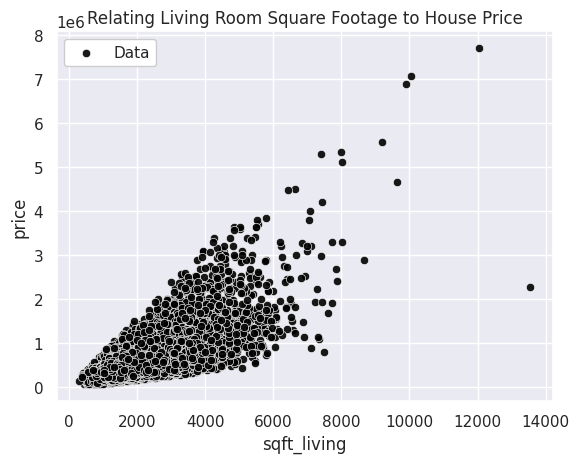

In [2]:
import pandas as pd

# For this example, we are only going to look at sqft_living and price
data = pd.read_csv("home_data.csv")
data = data[["sqft_living", "price"]]

display(data.head())
animl_plot_data(data, "sqft_living", "price")

Once we have loaded in the data, we are almost ready to train the model. We have to separate the data into our features and our labels, and then use `scikit-learn`'s [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model. The `fit` function trains the model on the given features and labels, and then we can inspect the fields of the model to find its coefficients.

In [3]:
from sklearn.linear_model import LinearRegression

# Separate our features and our targets
features = data[["sqft_living"]]
targets = data["price"]

# Create and train (fit) the model
model = LinearRegression()
model.fit(features, targets)

# Inspect the learned parameters
print(f"Learned w_0 = {model.intercept_}")
print(f"Learned w_1 = {model.coef_[0]}")

Learned w_0 = -43580.7403270849
Learned w_1 = 280.62356663364517


Now with this learned model, we can make predictions on data with the `predict` method. In this example, we predict on the same data we trained on but you could also pass in future data as well. We also include an additional custom function to plot the learned predictor against the data  to visually see the errors made.

Predictions: [287555.06830062 677621.82592138 172499.40598082 ... 242655.29763923
 405416.96628675 242655.29763923]



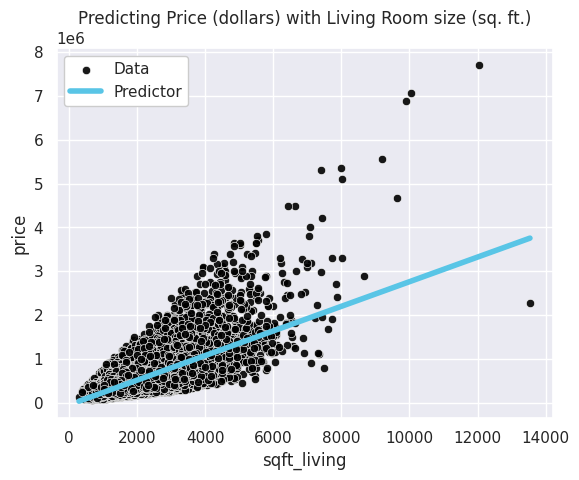

In [4]:
# Make predictions of the labels
predictions = model.predict(features)
print(f"Predictions: {predictions}")
print()

# Plot model and data
animl_plot_regression(features, targets, model)

You can see from the data and our predictor, that the model is definitely making errors since there is more going on here than a linear relationship between square footage of the living room and the house price. We summarize the important parts of the code above for a machine learning pipeline in the cell below. In the remainder of this chapter, we will discuss the underlying theory to understand why these models work and how to actually learn the coefficients from the data.

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# For this example, we are only going to look at sqft_living and price
data = pd.read_csv("home_data.csv")
data = data[["sqft_living", "price"]]

# Separate our features and our targets
features = data[["sqft_living"]]
targets = data["price"]

# Create and train (fit) the model
model = LinearRegression()
model.fit(features, targets)

# Make predictions on the data
predictions = model.predict(features)

## Linear Regression Theory

In a few sections, we will define the specifics of how we estimate these unknown parameters using some ML algorithm. As a brief preview, many ML algorithms for linear regression essentially boil down to trying many possible lines and identify which one is "best" from that set. So before we describe an algorithm, we should describe what makes one predictor the "best" over some others.

```{video} ../../_static/regression/linear_regression/manim_animations/many_lines_anim.mp4
```

What does "best" mean in this context? That is yet another judgement call we must make as modelers, and we call this the **Quality Metric**.

### Quality Metric

TODO highlight quality metric

```{margin}
{{ref_define_best}}\. Different choices of quality metrics lead to different results of the "best" model. For example, the majority of the quality metrics we introduce at the start of this book don't include any notion of fairness or anti-discrimination in them. If this notion is not included, the "best" model could permit one that discriminates since that might not violate your definition of "best". We will talk about this important field of fairness in ML later in this book.
```

The way we define how well a particular predictor fits the data is the **quality metric**<sup>{{ref_define_best}}</sup>. A common way to define the quality metric is to define the "cost" of using this model by trying to quantify the errors it makes. Defining the quality metric this way situates the ML algorithm as a process of trying to find the predictor that minimizes this cost.

```{margin}
{{ref_sigma}}\. 📝 *Notation*: The $\Sigma$ notation below means "sum". It is a concise of writing the sum of multiple items. If you are familiar with programming, think of it as summing up some values inside a loop. The number at the bottom of the notation is the starting value and the number at the top is the stopping value.
```

For the linear regression setting, a common definition of the quality metric is the **mean squared error** (or **MSE**)<sup>{{ref_sigma}}</sup>.

$$
\begin{align}
MSE(w_0, w_1) &= \frac{1}{n} \left( (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + ... + (y_n - \hat{y}_n)^2 \right)\\
&= \frac{1}{n}\sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2\\
&= \frac{1}{n}\sum_{i=1}^n \left((w_0 + w_1x_i) - y_i\right)^2\\
\end{align}
$$


The English explanation of this definition is the sum of the errors made by our model (squared) on the training dataset. This is visually shown in the animation below. Notice this $MSE$ function is parameterized by $w_0, w_1$. This lets us think of $MSE$ as a function that lets you ask "what is this MSE error if I use were to use this line?" A "better" model using this quality metric is one that has predictions closer to what our training dataset indicates.

As mentioned before, there are many different functions you could use to determine the quality of a particular model. For example, the Residual Sum of Square (RSS) or the Mean Absolute Error (MAE) are also used in some contexts. RSS is simply MSE but not divided by $n$, or, $MSE(w_0, w_1) = \frac{1}{n}RSS(w_0, w_1)$. Mean Absolute Error (MAE) is the sum of the errors but using the absolute value instead of squaring $MAE(w_0, w_1) = \sum_{i=1}^n \left| \hat{y}_i - y_i \right|$. In most of our regression settings, we will focus on MSE.

### ML Algorithm

TODO highlight ml pipeline

As a quick recap, we have defined the following steps:

* The linear regression model (how we assume the world works and what we will try to learn)
* The quality metric (how good a possible setting of the model parameters are)

Now we define an ML Algorithm to find the parameters that is the "best" according to our chosen quality metric.

Abstractly, the goal of the ML Algorithm is to solve the following optimization problem:


$$\hat{w}_0, \hat{w}_1 = \argmin{w_0, w_1} MSE(w_0, w_1)$$

In English, this is finding the settings of $w_0, w_1$​ that minimize MSE and using those for our predictor by claiming they are our best estimates $\hat{w}_0, \hat{w}_1$​. Stating the problem we want to solve is much easier than actually solving it in practice though! It's not the case that we can try every possible $w_0, w_1$​ since they can be real numbers (e.g., 14.3 or -7.4568). This means there are an infinite combination of $w_0, w_1$ pairs to try out before we can claim to have found the one that minimizes MSE!

```{sidebar}
![3D plot of the Mean Square Error. Looks like a piece of paper folded up by the corners with a low point near the center.](./mse.png)
```

Despite the impossibility of trying every possible $w_0, w_1$, in many cases we can still tractably solve this problem! Remember that MSE is a function that takes a particular setting of $w_0, w_1$ as inputs and returns the error using those particular parameters. In the case of two inputs like this, we can visualize $MSE(w_0, w_1)$ as a 3D plot that shows the MSE value for any particular setting of $w_0, w_1$.

In practice we don't actually need to plot this whole function to find the best $w_0, w_1$! It turns out with a little ML theory, we can prove that this function will be "bowl-like" as it is shown in the image above. Proving this is a bit more complex than we care to handle, but the intuition comes from the fact hat MSE is the sum of a bunch of squared functions, and since squared functions look "bowl-like" their sum will also look "bowl-like". Now what we care to know is that if we know that our function is shaped like a bowl, there is a clever algorithm called **gradient descent** that helps us minimize the function without trying *every possible input*.

The idea behind gradient descent is to start at one point (any point) and "roll down" the hill until you reach the bottom. If we know our function is "bowl-like", then this procedure will lead to the bottom of the bowl regardless of where we start!

Let's consider an example with one parameter instead of two: suppose we know what the best $w_0$ is and our job is to just find $w_1$ that minimizes the MSE. In this context, we don't have to visualize this 3D bowl but rather just a 2D bowl since there is only one degree of freedom.


```{video} ../../_static/regression/linear_regression/manim_animations/convex_anim.mp4
```

As described above, the idea of the gradient descent algorithm is to start at some point, and then repeatedly "roll down the hill" until we reach the bottom of the bowl. In this sense, it is an iterative algorithm that repeatedly performs some minor updates until it converges to what it thinks is the best solution.

While the algorithm is concise enough to explain in English, the details end up being slightly more complex. If you are familiar with calculus, you might remember derivative of a function tells you the slope at each point of a function. You don't need to ever compute a derivative for our course, but just know that there is a mathematical way to find the slope of many functions.

In the context of our original problem where we are trying to optimize both $w_0, w_1$​, this idea is the same in theory but only moderately different practice.  A "gradient" is just a multi-dimensional extension of the concept of a derivative (slope) of a function of more than one input that tells us the direction the function increases and by how much. Instead of using the slope to identify how we "roll down the hill" we compute a "gradient" to do identify which direction to travel; hence the name **gradient descent** It's the exact same idea as the animation above, but now we use this gradient idea to find the direction to go down.


```{video} ../../_static/regression/linear_regression/gradient_descent.mp4
:alt: Animation showing a 3D MSE function (bowl) and the accompanying line as the current estimate rolls down the hill
```

Visually, this gradient descent algorithm looks like rolling down the MSE hill until it converges at the bottom. It's important to highlight that the MSE function's input are the $w_0, w_1$ parameters  that we trying to use for our predictor. The right-hand side of the animation above is showing the predictor that would result by using the particular setting of $w_0, w_1$​ at each step of the algorithm. Notice that as the algorithm runs, the line seems to fit the data better and better! This is precisely because the algorithm is updating the coefficients bit-by-bit to reduce the error according to MSE.

```{margin}
{{ref_grad_desc}}\. 📝 *Notation*: We use $w$ to mean the vector $w = [w_0, w_1]$ and $w(t)$ to mean our predictor coefficients at step $t$ of the algorithm.

The $\nabla$ is the notation mathematicians use for the gradient (multi-dimensional slope) of a function.
```

While the exact notation isn't incredibly important for our course, we still think it is useful to at least see the algorithm of gradient descent written out with a mathematical notation<sup>{{ref_grad_desc}}</sup>.


```{prf:algorithm} Gradient Descent
:label: grad-descent

1. Start at some (random) point $w^{(0)}$ at $t = 0$
2. While we haven't converged:

    1. Compute gradient at current point (direction of ascent) $d \gets \nabla MSE(w^{(t)})$
    2. Update point $w^{(t + 1)} \gets w^{(t)} - \eta d$
    3. Update time $t \gets t + 1$
3. Output current $w^{(t)}$
```

In this algorithm, we repeatedly adjust our predictor until we reach the bottom of the bowl. There are some mathematical details we are omitting about how to compute this gradient, but the big idea of rolling down a hill is extremely important to know as an ML algorithm. We'll see over and over again that gradient descent is the algorithm used in almost any ML algorithm to find the best parameters of a model.

As a technical detail, there is a constant in the pseudo-code above $\eta$ called the *step-size*. $\eta$ controls how far we move on each iteration of the algorithm. In a future chapter we will discuss how your choice of $\eta$ effects the result of the algorithm, but for now all you need to know is you can choose how much you adjust the parameters at each step.

You might be wondering if this gradient-descent algorithm is always guaranteed to actually work for any function we want to roll down the hill. "Work" in this context would probably mean that it finds the settings of $w_0, w_1$​ that minimize the MSE. Gradient descent can only guarantee you that it will eventually converge to this global optimum if the MSE function is "bowl-like". Mathematically we say a function is "bowl-like" if it is **convex**; there are more fancy ways of defining what a convex function is, but we will suffice with saying a function is convex if it looks like a bowl when plotted!

If you don't have a guarantee that the function you are trying to minimize is convex, then there is no guarantee your gradient descent algorithm will find the best solution. Since gradient descent is always looking at the "locally optimal" direction to go, a function that is not convex might result in our algorithm getting stuck in a *local optima*.

```{video} ../../_static/regression/linear_regression/manim_animations/non_convex_anim.mp4
```

As mentioned above, we are lucky that in the case of linear regression our MSE quality metric will be convex! So that means running gradient descent will guarantee a global optimum.

### Feature Extraction

TODO highlight ML pipeline

TODO image of data and model

If you think back to our original dataset when introducing the chapter, you might notice that our linear regression model is doomed to fail if we believe the true (unknown) function is not actually linear. In the original animation, we drew this data from something that had a curve to it (i.e., not linear).

Any time you are deciding to use some type of model, you are making an **assumption** about how the world works. When you want to use linear regression, you are assuming the world operates linearly. Unfortunately there is no way to actually verify if that assumption is correct. Even with the data that we showed above that looks sufficiently curvey, it's entirely possible (albeit unlikely) that it is actually coming from a linear function and the noise just so happened to make the data look like it came from a curve!  We will revisit later this idea of using a model that does not match reality.

If we believe that the true function is more complex than a linear one, we could use a more complicated model. We could instead use **polynomial regression** model to model the unknown function as some polynomial. For example, if we thought the true function was a cubic function (a polynomial of degree 3), we could use the statistical model

$$y_i = w_0 + w_1x_i + w_2x_i^2 + w_3x_i^3 + \varepsilon_i$$

**Polynomial regression** is the general term for using a polynomial of any particular degree to model the task. In general, using polynomial regression with degree $p$ is using the statistical assumption that the world operates as:

$$y_i = w_0 + w_1x_i + w_2x_i^2 + ... + w_p x_i^p + \varepsilon_i$$

How do you go about training a polynomial regression model to find the right setting of paramters $w_0, ... w_p$? The exact same as linear regression! We use MSE as the quality metric, but with an input for every setting of $w_jl, and use an algorithm like gradient descent to find the optimal setting of the parameters. One of the very powerful things about gradient descent is it actually works really well for learning many different types of models! We will see gradient descent come up many times throughout the book.

You might be wondering if we can easily learn parameters for polynomial regression regardless of the degree, how do we choose what the right degree $p$ by just looking at the data? That is a central question in the next chapter, Assessing Performance.

Importantly, there is a more important lesson here for this section than just polynomials. In general, we call a **feature** some value that we derive from our data that we want to use in our model. **Feature extraction** is the process of generate some set of features from our raw input data.

```{margin}
{{ref_feature}}\. 📝 *Notation*: We use $h_j(x_i)$ to represent the jth feature we extract from the data input $x_i$. We choose a number $D$ for how many features we want to use in total.

It's common to also use the notation $h(x_i)$ (no subscript) to denote all $D$ features as one array of numbers (also called a feature vector) $h(x) = [h_0(x), ..., h_D(x)$$].
```

In general, we can generalize our model to the most general **regression** model with any set of features for our input data<sup>{{ref_feature}}</sup>.

$$
\begin{align}
y_i &= w_0h_0(x_i) + w_1h_1(x_i) + ... + h_Dh_D(x_i)\\
    &= \sum_{j=0}^D h_j(x_i)
\end{align}
$$

It's common to use $h_0(x) = 1$ so that the parameter $w_0$ represents an intercept term. But in general, you aren't limited to how you want to transform your input $x$ into features! For example, you could make $h_1(x) = x^2$ and $h_2(x) = \log(x)$. Each feature $h_j(x)$ will have its own associated parameter $w_j$.

Minor Note: It turns out that our general regression model, including the special case of polynomial regression, are actually just linear regression but in a more complex *feature space*! Note that the equation above for general regression is still a linear function ($ax + by + ...$) in the space of considering each feature its own value. In reality, it's possible and common for each feature to be related to our input $x$. The learned function doesn't look linear in the *input space* ($x$) but is linear in the *feature space* ($h(x)$). The reasoning for this point is not particularly important, but it is useful to know that all of these regression models we have discussed really do boil-down to linear regression with more/less complicated *features*.

## Multiple Data Inputs

So far, we have considered the case where our learning task only has a single data input $x$ such as square footage in our housing price example. What if we wanted to include more than just square footage in our model for house prices? You might imagine we know the number of bathrooms in the house as well as whether or not it is a new construction. Generally, we are given a data table of values that we might be interested in looking at in our model. In a data table, it's common to have a format like the following:

* Each row is a single example (e.g,, one house)
* Each column (except one) is a data input. There is usually one column reserved for the outcome value or target you want to predict.

| sq. ft. | # bathrooms | owner's age | ... | price   |
|---------|-------------|-------------|-----|---------|
| 1400    | 3           | 47          | ... | 65,000  |
| ...     | ...         | ...         | ... | ...     |
| 1250    | 2           | 36          | ... | 100,000 |

```{margin}
![A plane passing through a bunch of points in 3 dimensions (x1, x2, y)](./two_features.png)
```

Adding more data inputs that we can turn into more features allows us to make a model allows for more complex relationships to be learned. For example, a regression model that uses two of the inputs as features for this house price problem might look like the following.


$$y_i = w_0 + w_1 (sq. ft.) + w_2 + (\# bathrooms) + \varepsilon_i$$

Which we visualize as a plane instead of a line.

```{margin}
{{ref_recap_notation}}\. 📝 *Notation*:

* Data Input: $x_i = \left(x_i[1], x_i[2], ..., x_i[d]\right)$ where there are $d$ input columns and we use array notation to access them (e.g., $x[2]$).
* Output: $y_i$.
* $x_i$ is the $i^{th}$ row of our input data table.
* $x_i[j]$ is the $j^{th}$ column of the $i^{th}$ row.
* $h_j(x_i)$ is the $j^{th}$ feature extracted from the $i^{th}$ row (e.g., $h_2(x) = x[1] + x[3]^2$).
```

It's important that we highlight the difference between a **data input** and a **feature** and some notation used for them<sup>{{ref_recap_notation}}</sup>:

* Data input: Are columns of the raw data table provided/collected.
* Features are values (possible transformed) that the model will use. This is performed by the feature extraction $h(x)$ and are explicitly modelling choice by you, the machine learning practitioner, decides are relevant for the learning task.

```{margin}
{{ref_prelude}}\. More on this in the next chapter on Assessing Performance
```

You have the freedom to choose which data inputs you select to use as features and how you transform them. Conventionally, you use $h_0(x) = 1$ so that $w_0$ is the intercept. But then for example, you could make $h_1(x) = x[1]$ (the sq. ft.) and make $h_{12}(x) = \log(x[7]) * x[2]$. Generally adding more features means your model will be more complex which is not necessarily a good thing<sup>{{ref_prelude}}</sup>. Choosing how many features and what (if any) transformations to use a bit of an art and a science, so understanding in the next chapter how we evaluate our model is extremely important.

📝 As a notational remark, we should highlight that it's very common for people to assume that the data table you are working with has already been preprocessed to contain the features you want. They do this to avoid having to write $h_0(x) = 1$, $h_1(x) = ...$, everywhere in their work. It's important to remember that there is an explicit modeling step of transforming raw data to features (even if its implicit and not shown in the notation) and should double check what type of data you are working with.

```{admonition}  Garbage in $\rightarrow$ Garbage out
:class: tip

It can't be overstated the importance of how deciding which data you use and which features you derive from it have on your resulting model. Not even the fanciest machine learning algorithms can save you from disaster if you, as the modeller, choose features that have no relation, or worse, trick you into thinking there is a relation there when there is not. Most machine learning techniques rely on finding **correlations**  between the input/output. As you have hopefully heard **correlation is not causation**. Just because your model can find a relationship between the features you choose and your output doesn't actually mean such a relationship exists. A common example is that you can find a good linear relationship with the number of ice cream cones sold in a month (input) and the number of shark attacks (output), although most people don't think ice cream causes shark attacks.

It is incredibly important that you think carefully about what data you are including as it can effect the real-world decisions your model might make. In the data table above, we listed "owner's age" as a data input. Is that something that is appropriate to use a feature for our model? Why does that seem less appropriate to include than something like square footage? And these choices have real consequences. For example, [some companies problematically underestimate a house's value by a wide margin when they assume the house is owned by a Black family](https://www.nytimes.com/2022/08/18/realestate/housing-discrimination-maryland.html). This happens because they (intentionally or, more likely, unintentionally) use the owner's race as part of their modeling process.

Remember that which data you include is *the first and most important* modelling step, even if most machine learning practitioners rush past that part and focus more on the fanciest machine learning method the can apply.
```

## Recap / Reflection

In this chapter we introduced the machine learning pipeline as it is applied to regression models, namely linear regression.

We introduced some terminology that we will use throughout the book like the difference between a model and a predictor, the format of the data we learn from, how we can determine features of the model, and how to learn and assess a predictor. We will see these general ideas in the ML pipeline surface frequently in this book. It is always good to start using that as a reference point for the new concepts you are learning.

We specifically discussed the context of regression and linear regression. Understanding how to formulate a problem as a regression problem and use linear regression to help you learn a predictor is a very important skill as part of your journey to mastering machine learning! Additionally, understanding how linear regression and polynomial regression are really the same model with different sets of features is a very powerful building-block on that journey.

### Test your Understanding

In [6]:
questions = [
    {
        "question": r"""
            Suppose we were testing a new drug treatment for a particular disease. We have gathered data from various trials that recorded the average response (a number, where 0 is low response and a higher number is a high response) in an experiment that used a particular dosage (measured in mg).
            <br /><br />

            We suspect there is a linear relationship between the response ($y$) and the dosage in mg ($x$), so we decide to model this data with a linear regression model.

            $$y_i = w_0 + w_1x_i + \varepsilon_i$$

            Suppose that after training a model, we find $\hat{w}_0 = 1$ $\hat{w}_1 = 2$. Which of the following interpretations of the learned predictor are true?
            <br /><br />

            <i>Select all that apply</i>.
            """,
        "type": "many_choice",
        "answers": [
            {
                "answer": "The predicted response for a 0mg dose is expected to be 0.",
                "correct": False
            },
            {
                "answer": "The predicted response for a 0mg dose is expected to be 1.",
                "correct": True
            },
            {
                "answer": "The predicted response for a 0mg dose is expected to be 2.",
                "correct": False
            },
            {
                "answer": "If we were to increase the dosage by 2mg, we expect that the response would increase by 1.",
                "correct": False
            },
            {
                "answer": "If were to increase the dosage by 1mg, we expect that the response would increase by 0.002.",
                "correct": False
            },
            {
                "answer": "If we were to increase the dosage by 1mg, we expect that the response would increase by 2.",
                "correct": True
            },
        ]
    },
    {
        "question": r"""
            Suppose in the setup for the last question, we had the following dataset.<br /><br />
            <table class="tg" style="undefined;table-layout: fixed; width: 284px">
                <colgroup>
                    <col style="width: 117px">
                    <col style="width: 167px">
                </colgroup>
                <thead>
                  <tr>
                    <th class="tg-0pky">Drug Dosage</th>
                    <th class="tg-0pky">Response</th>
                  </tr>
                </thead>
                <tbody>
                  <tr>
                    <td class="tg-2bhk">10</td>
                    <td class="tg-2bhk">19</td>
                  </tr>
                  <tr>
                    <td class="tg-0pky">2</td>
                    <td class="tg-0pky">8</td>
                  </tr>
                  <tr>
                    <td class="tg-2bhk">3</td>
                    <td class="tg-2bhk"><span style="font-weight:400;font-style:normal">7</span></td>
                  </tr>
                  <tr>
                    <td class="tg-0pky">9</td>
                    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">18</span></td>
                  </tr>
                </tbody>
            </table>

            <br />
            Consider our learned predictor $\hat{w}_0 = 1$ and $\hat{w}_1 = 2$. What is the $MSE$ of this learned predictor on this training dataset?
        """,
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 3.5,
                "correct": True,
                "feedback": r"""
                    Recall that the $MSE$ or residual sum of squares is defined as

                    $$MSE(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n \left(y_i - (w_0 + w_1 x_i)\right)^2$$

                    This means our $MSE$ is (scroll for calculation)

                    $$\frac{1}{4}\left(19 - (1 + 2 \cdot 10)\right)^2 + \left(8 - (1 + 2 \cdot 2)\right)^2 + \left(7 - (1 + 2 \cdot 3)\right)^2 + \left(18 - (1 + 2 \cdot 9)\right)^2 = \frac{14}{4} = 3.5$$
                """
            },
            {
                "type": "default",
                "correct": False,
                "feedback": "Try to use our MSE formula to compute the average error on each data point!"
            },
        ]
    },
    {
        "question": r"""
            Suppose we trained a regression model with the following features:

            <ul>
                <li>$h_0(x_i) = 1$ (a constant feature for the intercept)</li>
                <li>$h_1(x_i) = x_i[1]$</li>
                <li>$h_2(x_i) = x_i[2]$</li>
                <li>$h_3(x_i) = x_i[1]^2$</li>
                <li>$h_4(x_i) = \log(x_i[2])$</li>
                <li>$h_5(x_i) = e^{x_i[1]}$</li>
            </ul>
        """,
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 6,
                "correct": True,
                "feedback": r"""
                    If we use these features, then our model will be

                    $$y = \sum_{j=0}^5 w_j \cdot h_j(x_i) + \varepsilon_i$$

                    That is 6 $w_j$'s in total that we have to learn.
                """
            },
            {
                "type": "default",
                "correct": False,
                "feedback": "Try to use our MSE formula to compute the average error on each data point!"
            },
        ]
    },
    {
        "question": "Polynomial regression is equivalent to linear regression using polynomial features of the input $x_i$",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "True",
                "correct": True
            },
            {
                "answer": "False",
                "correct": False
            },
        ]
    }
]

from jupyterquiz import display_quiz
display_quiz(questions, shuffle_answers=False)

<IPython.core.display.Javascript object>